# Maximum Independent Set

# Complement Graph


In [101]:
def complement_graph(adj_matrix):
    size = len(adj_matrix)
    complement_matrix = [[0] * size for _ in range(size)]
    
    for i in range(size):
        for j in range(size):
            if i != j:
                complement_matrix[i][j] = 1 - adj_matrix[i][j]
    
    return complement_matrix


# Maximum Clique

In [102]:
def maxclique(P, R=None, X=None):


    # candidates
    P = set(P)

    # Set of nodes in the current clique being built (initially empty).
    R = set() if R is None else R

    #Set of nodes that are excluded from the current clique being built (initially empty).
    X = set() if X is None else X
    
    if not P and not X:
        yield R
    while P:
        v = P.pop()
        yield from maxclique(
            P=P.intersection(N[v]), R=R.union([v]), X=X.intersection(N[v]))
        X.add(v)

# Plot Graph

In [103]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def plot_graph(adj_matrix):
    G = nx.from_numpy_array(np.array(adj_matrix))
    nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=300)
    plt.show()

# Example 1

The clique of size 3: {0, 3, 4}
The clique of size 3: {1, 2, 4}
The maximum clique is: {0, 3, 4} with size 3


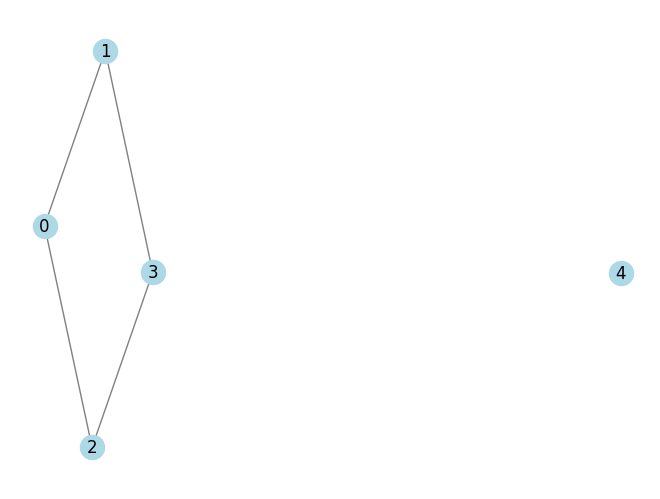

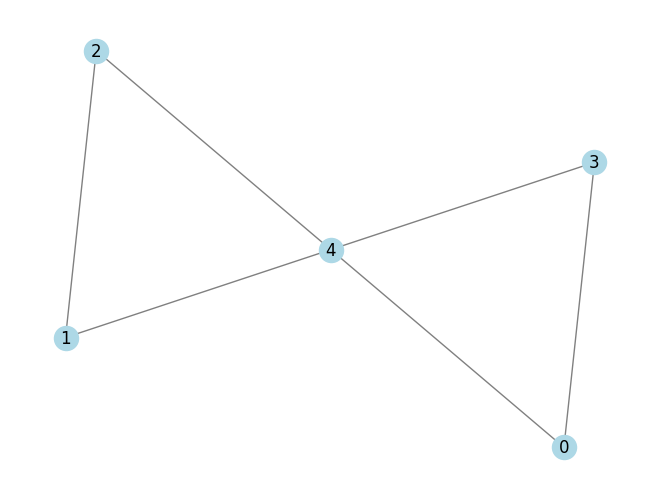

In [104]:
adj_matrix1 = [
    [0, 1, 1, 0, 0],
    [1, 0, 0, 1, 0],
    [1, 0, 0, 1, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0]
]

adj_matrix_c1 = complement_graph(adj_matrix1)




N = {
    i: set(num for num, j in enumerate(row) if j)
    for i, row in enumerate(adj_matrix_c1)
}

P1 = N.keys()
cliques1 = list(maxclique(P1))

max_clique1 = max(cliques1, key=len)
max_clique_size1 = len(max_clique1)

# Print all the cliques and their sizes
for clique1 in cliques1:
    clique_size1 = len(clique1)
    print(f"The clique of size {clique_size1}: {clique1}")

print(f"The maximum clique is: {max_clique1} with size {max_clique_size1}")
plot_graph(adj_matrix1)
plot_graph(adj_matrix_c1)

# Example 2

The clique of size 3: {0, 1, 5}
The clique of size 3: {0, 4, 5}
The clique of size 3: {0, 8, 5}
The clique of size 2: {0, 9}
The clique of size 3: {1, 5, 6}
The clique of size 3: {9, 2, 7}
The clique of size 2: {3, 7}
The clique of size 3: {4, 5, 7}
The clique of size 3: {8, 5, 7}
The clique of size 2: {9, 6}
The maximum clique is: {0, 1, 5} with size 3


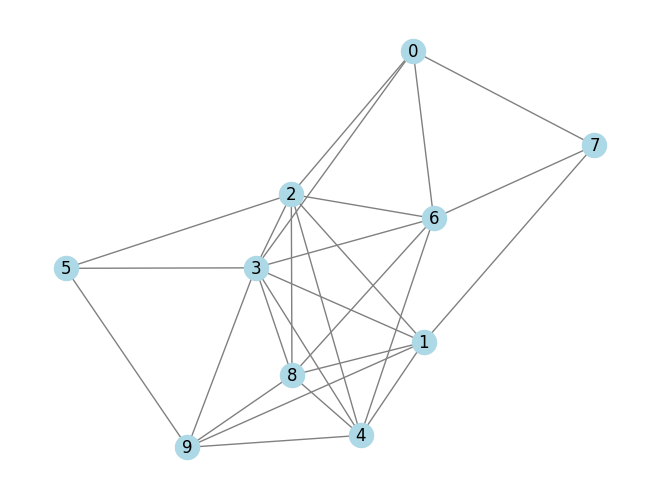

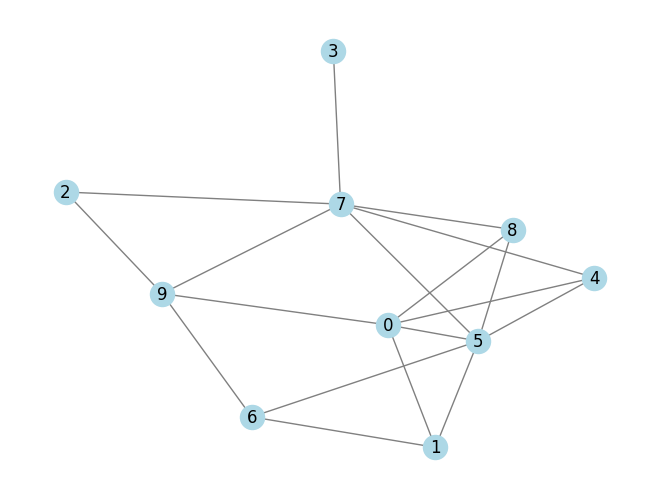

In [105]:
import random

num_nodes = 10
adj_matrix2 = [[0] * num_nodes for _ in range(num_nodes)]

for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        # Generate a random edge between nodes i and j
        edge = random.randint(0, 1)
        
        # Check if adding this edge creates a cycle
        if edge == 1 and (adj_matrix2[i][j] == 1 or adj_matrix2[j][i] == 1):
            edge = 0
        
        adj_matrix2[i][j] = edge
        adj_matrix2[j][i] = edge

adj_matrix_c2 = complement_graph(adj_matrix2)
N = {
    i: set(num for num, j in enumerate(row) if j)
    for i, row in enumerate(adj_matrix_c2)
}

P2 = N.keys()
cliques2 = list(maxclique(P2))

max_clique2 = max(cliques2, key=len)
max_clique_size2 = len(max_clique2)

# Print all the cliques and their sizes
for clique2 in cliques2:
    clique_size2 = len(clique2)
    print(f"The clique of size {clique_size2}: {clique2}")

print(f"The maximum clique is: {max_clique2} with size {max_clique_size2}")
plot_graph(adj_matrix2)
plot_graph(adj_matrix_c2)